# **Life Expectancy Regression**

|Name|Admin Number|Class|
|:----:|:----:|:----:|
|Fitri Amir|2222811|DAAA/FT/2A/06|

## **Exploring and Cleaning Data**

In [69]:
import numpy as np 
import pandas as pd 
import sympy as sp 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import math
warnings.filterwarnings('ignore')


sns.set_theme()

In [70]:
df = pd.read_excel("./6. Life Table 2003_2022 SG/6. Life Table 2003_2022 SG.xlsx")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Year                                                               500 non-null    int64  
 1   age_x                                                              500 non-null    int64  
 2   Expectation of life at age x                                       500 non-null    float64
 3   Unnamed: 3                                                         0 non-null      float64
 4   Unnamed: 4                                                         0 non-null      float64
 5   Complete Life Tables for Singapore Resident Population, 2018-2022  1 non-null      object 
 6   Unnamed: 6                                                         1 non-null      object 
dtypes: float64(3), int64(2), ob

In [164]:
df.describe()

,Year,age_x,Expectation of life at age x,Unnamed: 3,Unnamed: 4
count,500.00000,500.000000,500.000000,0.0,0.0
mean,2020.00000,49.500000,37.340200,NaN,NaN
std,1.41563,28.894979,25.179194,NaN,NaN
min,2018.00000,0.000000,2.300000,NaN,NaN
25%,2019.00000,24.750000,13.600000,NaN,NaN
50%,2020.00000,49.500000,34.900000,NaN,NaN
75%,2021.00000,74.250000,59.175000,NaN,NaN
max,2022.00000,99.000000,83.700000,NaN,NaN


In [72]:
df.head()

,Year,age_x,Expectation of life at age x,Unnamed: 3,Unnamed: 4,"Complete Life Tables for Singapore Resident Population, 2018-2022",Unnamed: 6
0,2022,0,83.0,NaN,NaN,Source:,https://www.singstat.gov.sg/publications/popul...
1,2022,1,82.1,NaN,NaN,NaN,NaN
2,2022,2,81.1,NaN,NaN,NaN,NaN
3,2022,3,80.1,NaN,NaN,NaN,NaN
4,2022,4,79.1,NaN,NaN,NaN,NaN


As we can see, we will need to drop the last 4 columns as they were metadeta provided by the authors of the dataset. 

In [73]:
cleaned_data = df.drop(df.columns[[3,4,5,6]], axis=1)

In [74]:
cleaned_data.head()

,Year,age_x,Expectation of life at age x
0,2022,0,83.0
1,2022,1,82.1
2,2022,2,81.1
3,2022,3,80.1
4,2022,4,79.1


## Model 1:  SLR with intercept $a$ fixed => $\hat{y} = bx_i$

In [136]:
b = 10 
alpha = 0.00005 
epsilon = 0.001 
max_iters = 1000 

def E(b):
    summation = 0
    for rownum in np.arange(len(df)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        summation += (y - b*x)**2
    return 1/len(cleaned_data) * summation

def Eprime(b):
    summation = 0
    for rownum in np.arange(len(df)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        summation += x * (y - b*x)
    return -2/len(cleaned_data) * summation

model1_gradientdesc = pd.DataFrame(columns=['b', 'E(b)'])

for iter in range(max_iters): 
    new_b = b - alpha * Eprime(b)
    print(f"Iteration {iter + 1}: b-value = {new_b}, E(b) = {E(new_b)}")
    diff = abs(E(new_b) - E(b)) 
    model1_gradientdesc = pd.concat([model1_gradientdesc, pd.DataFrame({'b': [new_b], 'E(b)': [E(new_b)]})], ignore_index=True)
    if diff < epsilon: 
        print(f"The local minimum occurs at b = {new_b}")
        break
    b = new_b

print(f"In {iter} iterations, the local minimum occurs at b = {new_b} with a minimum error of E(b) = {E(new_b)}")

Iteration 1: b-value = 6.829106860000001, E(b) = 139778.53488696832
Iteration 2: b-value = 4.699376482519, E(b) = 63956.64525875404
Iteration 3: b-value = 3.2689430744838868, E(b) = 29752.35038158626
Iteration 4: b-value = 2.308192475977103, E(b) = 14322.323594059391
Iteration 5: b-value = 1.6629043364900207, E(b) = 7361.626771663418
Iteration 6: b-value = 1.2294965576035222, E(b) = 4221.56091691845
Iteration 7: b-value = 0.9383982229144057, E(b) = 2805.0341202893046
Iteration 8: b-value = 0.7428820264204605, E(b) = 2166.0194440409336
Iteration 9: b-value = 0.6115635730453024, E(b) = 1877.7511547063948
Iteration 10: b-value = 0.5233635338358773, E(b) = 1747.7093736259878
Iteration 11: b-value = 0.46412397750086704, E(b) = 1689.0457416822712
Iteration 12: b-value = 0.4243357294884573, E(b) = 1662.5817723007726
Iteration 13: b-value = 0.39761195271092237, E(b) = 1650.643512560959
Iteration 14: b-value = 0.379662928038291, E(b) = 1645.2579997695611
Iteration 15: b-value = 0.36760746561691

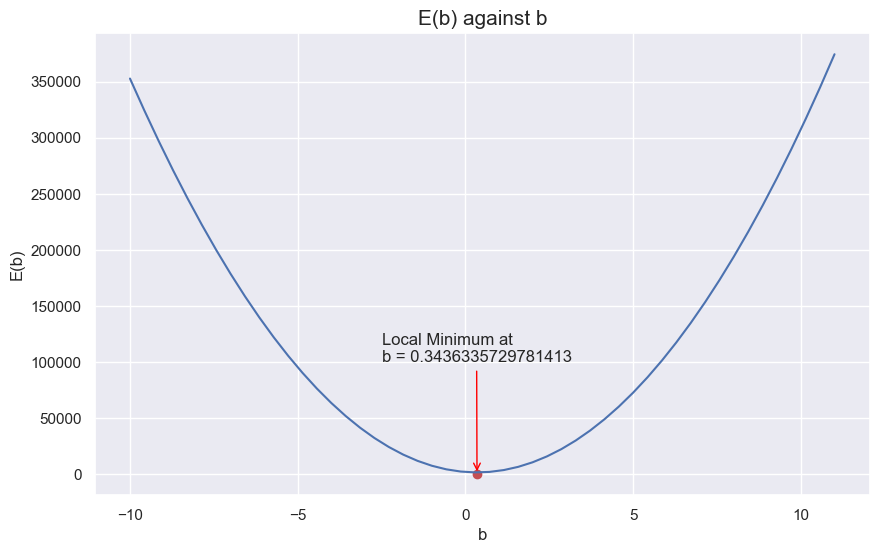

In [76]:
b_values = np.linspace(-10, 11, 50) # values of b to be plotted
error_func = [E(b) for b in b_values] # values of error function for each value of b

plt.figure(figsize=(10,6))
plt.plot(b_values, error_func) # plot error function against b

plt.scatter(b, 0, color='r', alpha=1) # location of local minimum
plt.annotate(text=f'Local Minimum at\nb = {b}', xy=(b, 100), xytext=(-2.5, 10**5), size=12, 
                arrowprops=dict(arrowstyle="->", color='red'))
                
plt.xlabel('b')
plt.ylabel('E(b)')
plt.title('E(b) against b', size=15)
plt.show()

In [77]:
def model1hyperparam(b, alpha, epsilon, max_iters):
    b_val_array = b
    alpha_array = alpha 
    epsilon = epsilon 
    max_iters = max_iters 
    first_test = pd.DataFrame(columns=['alpha', 'Starting b-value', 'Iterations', 'b', 'E(b)']) 
    final_test = pd.DataFrame(columns=['alpha', 'Starting b-value', 'Iterations', 'b', 'E(b)'])

    for alpha in alpha_array: 
        for starting_b in b_val_array:
            b = starting_b
            for iter in range(max_iters): 
                b_new = b - alpha * E_prime(b) 
                diff = abs(E(b_new) - E(b)) 
                if diff < epsilon:
                    first_test.loc[len(first_test)] = [alpha, starting_b, iter + 1, b_new, E(b_new)]
                    break
                b = b_new
    first_test.sort_values(by=['E(b)'], inplace=True)            
    finalTestVal = first_test.iloc[0]['Starting b-value'] 
    b_FinalTest = np.arange(finalTestVal/2, finalTestVal * 2, finalTestVal/10) 

    for starting_b in b_FinalTest:
            b = starting_b
            for iter in range(max_iters): 
                b_new = b - alpha * E_prime(b) 
                diff = abs(E(b_new) - E(b)) 
                if diff < epsilon:
                    final_test.loc[len(final_test)] = [alpha, starting_b, iter + 1, b_new, E(b_new)]
                    break
                b = b_new
    final_test.sort_values(by=['E(b)'], inplace=True)

    return final_test

results_df = model1hyperparam([-1000, -100, -1, 0, 1, 100, 1000], [0.00005], 0.001, 1000)
# results_df.sort_values(by=['E(b)'], inplace=True) # sort results by error function
print(results_df)

      alpha  Starting b-value  Iterations         b         E(b)
5   0.00005               1.0        19.0  0.343289  1640.832186
13  0.00005               1.8        21.0  0.343289  1640.832186
3   0.00005               0.8        18.0  0.343301  1640.832213
14  0.00005               1.9        21.0  0.343313  1640.832240
9   0.00005               1.4        20.0  0.343317  1640.832250
6   0.00005               1.1        19.0  0.343341  1640.832311
0   0.00005               0.5        15.0  0.343349  1640.832331
10  0.00005               1.5        20.0  0.343351  1640.832338
2   0.00005               0.7        17.0  0.343359  1640.832358
4   0.00005               0.9        18.0  0.343379  1640.832413
11  0.00005               1.6        20.0  0.343386  1640.832435
1   0.00005               0.6        16.0  0.343389  1640.832441
7   0.00005               1.2        19.0  0.343393  1640.832454
12  0.00005               1.7        20.0  0.343421  1640.832540
8   0.00005              

## Model 2:  SLR  => $\hat{y} = a + bx_i$

a) Express Error function $E(a,b)$ in terms of a and b.  Hence, derive $E_a(a,b)$ and $E_b(a,b)$.

In [161]:
a = 80 
b = 0 
alpha = 0.00001 
epsilon = 0.001
max_iters = 1000 

def E(a, b):
    summation = 0
    for rownum in np.arange(len(cleaned_data)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        summation += (y - a - b*x)**2
    return 1/len(cleaned_data) * summation 

def partial_E_a(a, b): # wrt a
    summation = 0
    for rownum in np.arange(len(cleaned_data)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        summation += y - a - b*x
    return -2/len(cleaned_data) * summation

def partial_E_b(a, b): # wrt b
    summation = 0
    for rownum in np.arange(len(cleaned_data)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        summation += x * (y - a - b*x)
    return -2/len(cleaned_data) * summation

model2_gradientdesc = pd.DataFrame(columns=['a-value', 'b-value', 'E(a,b)']) 

for iter in range(max_iters):
    new_a = a - alpha * partial_E_a(a, b)
    new_b = b - alpha * partial_E_b(a, b)
    diff = abs(E(new_a, new_b) - E(a, b))
    print(f"Iteration {iter+1}: a = {new_a}, b = {new_b}, E(a,b) = {E(new_a, new_b)}")
    model2_gradientdesc.loc[len(model2_gradientdesc)] = [new_a, new_b, E(new_a, new_b)]
    if diff < epsilon:
        print(f"Iteration {iter + 1}: a = {new_a}, b = {new_b}, E(a,b) = {E(new_a, new_b)}")
        print(f"The local minimum occurs at a = {new_a}, b = {new_b}")
        break
    a = new_a
    b = new_b

print(f"In {iter} iterations, the local minimum occurs at a = {new_a} b = {new_b} with a minimum error of E(b) = {E(new_a, new_b)}")

Iteration 1: a = 79.999146804, b = -0.056678628, E(a,b) = 2141.815821604243
Iteration 2: a = 79.99834973690565, b = -0.1096343258352, E(a,b) = 1870.5338145698495
Iteration 3: a = 79.99760511189349, b = -0.15911163389713906, E(a,b) = 1633.7196357167797
Iteration 4: a = 79.99690948430882, b = -0.20533902995988854, E(a,b) = 1426.9939633447534
Iteration 5: a = 79.99625963575879, b = -0.24852998425188838, E(a,b) = 1246.5338919701892
Iteration 6: a = 79.99565255925049, b = -0.288883945225468, E(a,b) = 1089.0022366734552
Iteration 7: a = 79.99508544530508, b = -0.3265872605761695, E(a,b) = 951.4858197064631
Iteration 8: a = 79.99455566898415, b = -0.36181403776498444, E(a,b) = 831.4415981164423
Iteration 9: a = 79.99406077776815, b = -0.3947269480172523, E(a,b) = 726.6496361429096
Iteration 10: a = 79.99359848023114, b = -0.4254779775109498, E(a,b) = 635.1720527228209
Iteration 11: a = 79.99316663545927, b = -0.45420912922323453, E(a,b) = 555.3171849345063
Iteration 12: a = 79.9927632431645, 

In [143]:
fig = px.scatter_3d(model2_gradientdesc, x='a-value', y='b-value', z='E(a,b)')

fig.update_layout(title='3D Gradient Descent of Model 2')

fig.show()
    

## Multiple Linear Regression

### Model 3: MLR => $\hat{y} = a + bx_i + cw_i$

A linear regression model with more than one predictor is called Multiple Linear Regression (MLR) model. Apply the MLR model where intercept a, and slopes b and c are to be determined, when predicting Expectation of life at age x (y) using Age_x (x) and w as the predictors. Decide on a suitable variable w based on the context of your dataset.


I decided to make a new variable using the ones given in the dataset, called the Life Expectancy Ratio. I used `Expectationf of life at age x`/ `age_x` to obtain it. For example, if the life expectancy at age x is 80 and the age_x is 60, the LERatio would be 80 / 60 = 1.33. This indicates that, on average, people of age 60 can expect to live around 1.33 times their current age. The variable provides insights into how life expectancy compares to the current age and can help identify patterns where life expectancy exceeds or falls short of the current age.

In [168]:
cleaned_data['LERatio'] = cleaned_data['Expectation of life at age x'] / cleaned_data['age_x']

cleaned_data['LERatio'] = cleaned_data.apply(lambda row: row['Expectation of life at age x'] if row['age_x'] == 0 else row['LERatio'], axis=1)
print(cleaned_data)

     Year  age_x  Expectation of life at age x    LERatio
0    2022      0                          83.0  83.000000
1    2022      1                          82.1  82.100000
2    2022      2                          81.1  40.550000
3    2022      3                          80.1  26.700000
4    2022      4                          79.1  19.775000
..    ...    ...                           ...        ...
495  2019     95                           3.6   0.037895
496  2019     96                           3.3   0.034375
497  2019     97                           3.1   0.031959
498  2019     98                           2.8   0.028571
499  2019     99                           2.6   0.026263

[500 rows x 4 columns]


In [206]:
a = 90 
b = 0 
c = 0
alpha = 0.000025 
epsilon = 0.001
max_iters = 1000 

def E(a, b, c):
    summation = 0
    for rownum in np.arange(len(cleaned_data)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        w = cleaned_data.loc[rownum, 'LERatio']
        summation += (y - a - b*x - c*w)**2
    return 1/len(cleaned_data) * summation

def partialE_a(a, b, c): # 1st derivative of E(a, b, c) with respect to a
    summation = 0
    for rownum in np.arange(len(cleaned_data)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        w = cleaned_data.loc[rownum, 'LERatio']
        summation += y - a - b*x - c*w
    return -2/len(cleaned_data) * summation

def partialE_b(a, b, c): # 1st derivative of E(a, b, c) with respect to b
    summation = 0
    for rownum in np.arange(len(cleaned_data)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        w = cleaned_data.loc[rownum, 'LERatio']
        summation += x * (y - a - b*x - c*w)
    return -2/len(cleaned_data) * summation

def partialE_c(a, b, c): # 1st derivative of E(a, b, c) with respect to c
    summation = 0
    for rownum in np.arange(len(cleaned_data)):
        x = cleaned_data.loc[rownum, 'age_x']
        y = cleaned_data.loc[rownum, 'Expectation of life at age x']
        w = cleaned_data.loc[rownum, 'LERatio']
        summation += w * (y - a - b*x - c*w)
    return -2/len(cleaned_data) * summation

for iter in range(max_iters): # Gradient Descent
    new_a = a - alpha * partialE_a(a, b, c) # update of a
    new_b = b - alpha * partialE_b(a, b, c) # update of b
    new_c = c - alpha * partialE_c(a, b, c) # update of c
    diff = abs(E(new_a, new_b, new_c) - E(a, b, c)) # stopping criterion
    print(f"Iteration {iter+1}: a = {new_a}, b = {new_b}, c= {new_c}, E(a,b,c) = {E(new_a, new_b, new_c)}")
    if diff < epsilon:
        print(f"The local minimum occurs at a = {new_a}, b = {new_b}, c={new_c}")
        break
    a = new_a
    b = new_b
    c = new_c

print(f"In {iter} iterations, the local minimum occurs at a = {new_a} b = {new_b} c = {new_c} with a minimum error of E(b) = {E(new_a, new_b, new_c)}")

Iteration 1: a = 89.99736701, b = -0.16644657, c= -0.003159861780552354, E(a,b,c) = 2387.9744778722197
Iteration 2: a = 89.99514677236752, b = -0.3055544899926935, c= -0.005987540119116798, E(a,b,c) = 1677.0167467714164
Iteration 3: a = 89.99327153334936, b = -0.4218137107428978, c= -0.008535947251166284, E(a,b,c) = 1180.3929203184884
Iteration 4: a = 89.99168466635128, b = -0.5189767810768453, c= -0.010849319870467432, E(a,b,c) = 833.4827028626291
Iteration 5: a = 89.99033884448485, b = -0.6001799542207208, c= -0.01296464381961843, E(a,b,c) = 591.1484828716717
Iteration 6: a = 89.98919451324383, b = -0.6680444043826236, c= -0.014912844799331975, E(a,b,c) = 421.8614032775909
Iteration 7: a = 89.98821861401872, b = -0.7247608201486442, c= -0.01671978352408875, E(a,b,c) = 303.59839160621823
Iteration 8: a = 89.98738351725339, b = -0.7721601047823725, c= -0.01840708744067119, E(a,b,c) = 220.97621456265384
Iteration 9: a = 89.98666613081343, b = -0.8117724651441522, c= -0.01999284585147043

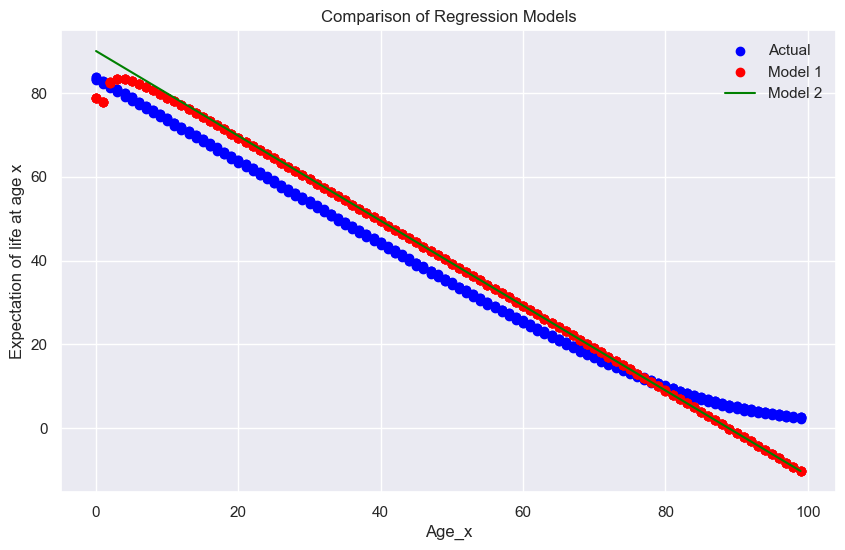

In [218]:
a_model1 = 89.957
b_model1 = -1.0117
w_model1 = -0.13424
x_model1 = cleaned_data['age_x']
y_model1 = a_model1 + b_model1 * x_model1 + w_model1 * cleaned_data['LERatio']

a_model2 = new_a  
b_model2 = new_b 
x_model2 = cleaned_data['age_x']
y_model2 = a_model2 + b_model2 * x_model2

# Plotting both models
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.scatter(x_model1, cleaned_data['Expectation of life at age x'], color='blue', label='Actual')

# Plot regression line of Model 1 in red
plt.scatter(x_model1, y_model1, color='red', label='Model 2')

# Plot regression line of Model 2 in green
plt.plot(x_model2, y_model2, color='green', label='Model 3')

plt.xlabel('Age_x')
plt.ylabel('Expectation of life at age x')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()